# Chapter 8 - The SARIMA Model


Download the code from this Kaggle competition: [Walmart Recruiting - Store Sales Forecasting](https://www.kaggle.com/competitions/walmart-recruiting-store-sales-forecasting/)

## Listing 8-1. Importing the data and creating a plot


<Axes: xlabel='Date', ylabel='Weekly sales'>

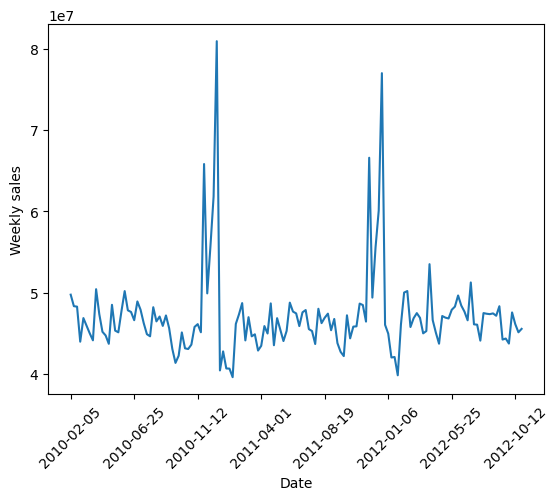

In [13]:
import pandas as pd

data = pd.read_csv("train.csv")
data = data.groupby("Date")["Weekly_Sales"].sum()
data.plot(ylabel="Weekly sales", rot=45)

## Listing 8-2. Fitting a SARIMA(1,1,1)(1,1,1)52 model


c:\Users\bodau\Documents\Dev\Advanced-Forecasting-with-Python-2nd-ed\Advanced-Forecasting-with-Python-2nd-ed\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
c:\Users\bodau\Documents\Dev\Advanced-Forecasting-with-Python-2nd-ed\Advanced-Forecasting-with-Python-2nd-ed\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
c:\Users\bodau\Documents\Dev\Advanced-Forecasting-with-Python-2nd-ed\Advanced-Forecasting-with-Python-2nd-ed\.venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


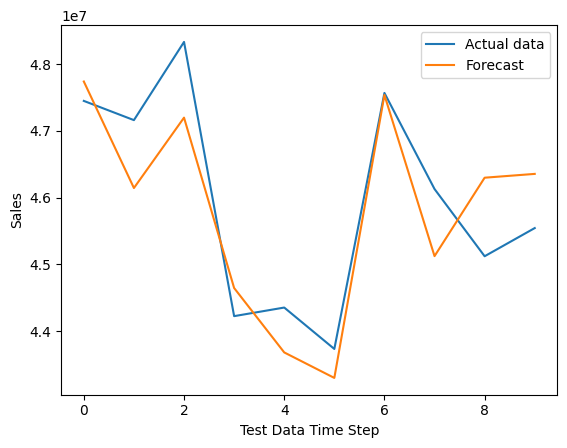

R² Score: 0.7310


In [17]:
import statsmodels.api as sm
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import random

random.seed(12345)

train = data[:-10]
test = data[-10:]
mod = sm.tsa.statespace.SARIMAX(
    data[:-10], order=(1, 1, 1), seasonal_order=(1, 1, 1, 52)
)
res = mod.fit(disp=False)
fcst = res.forecast(steps=10)

plt.plot(list(test))
plt.plot(list(fcst))
plt.legend(["Actual data", "Forecast"])
plt.ylabel("Sales")
plt.xlabel("Test Data Time Step")
plt.show()

print(f"R² Score: {r2_score(test, fcst):.4f}")

## Listing 8-3. Tuning the SARIMA model


In [ ]:
import mlflow

exp = mlflow.create_experiment(name="sarima3")
print("exp = ", exp)

scores = []
for p in range(2):
    for i in range(2):
        for q in range(2):
            for P in range(2):
                for D in range(2):
                    for Q in range(2):
                        run = mlflow.start_run(experiment_id=exp)
                        print("run = ", run.info.run_id)

                        mlflow.log_param("small_p", p)
                        mlflow.log_param("small_q", q)
                        mlflow.log_param("i", i)
                        mlflow.log_param("cap_P", P)
                        mlflow.log_param("D", D)
                        mlflow.log_param("cap_Q", Q)

                        try:
                            mod = sm.tsa.statespace.SARIMAX(
                                train, order=(p, 0, q), seasonal_order=(P, D, Q, 52)
                            )
                            res = mod.fit(disp=False)

                            r2 = r2_score(test, res.forecast(steps=10))

                            score = [p, i, q, P, D, Q, r2]
                            print(score)
                            scores.append(score)

                            mlflow.log_metric("10step-r2-score-test", r2)

                            del mod
                            del res

                        except Exception:
                            print("errored")

                        mlflow.end_run()

res = pd.DataFrame(scores)
res.columns = ["p", "i", "q", "P", "D", "Q", "score"]
res.sort_values("score")

exp =  732670518662075784
run =  406d073f68864852b8fef0afd616994a
[0, 0, 0, 0, 0, 0, -907.1066113344237]
run =  3b22352a963c44e59841cd50f0d23b7e


/opt/anaconda3/envs/chapter7/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/chapter7/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/chapter7/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/chapter7/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/chapter7/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarn

[0, 0, 0, 0, 0, 1, -400.09265533576155]
run =  861f970c5ebd45f49151f9099b8273d1
[0, 0, 0, 0, 1, 0, 0.3708213108942816]
run =  2678ffe047f344abb9b574b2a5d10288


/opt/anaconda3/envs/chapter7/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/chapter7/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/chapter7/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/chapter7/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/chapter7/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarn

[0, 0, 0, 0, 1, 1, 0.3702845954113335]
run =  1657199016284c52b1efa53661b8588e


/opt/anaconda3/envs/chapter7/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/chapter7/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/chapter7/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


[0, 0, 0, 1, 0, 0, 0.34220397418395754]
run =  e4439f3c93cc4a129c48a1d2e9a92443


/opt/anaconda3/envs/chapter7/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/chapter7/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/chapter7/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


[0, 0, 0, 1, 0, 1, 0.11461458512647271]
run =  cd1aa48ab5fd4de6bf3e50ad00e4f9af


/opt/anaconda3/envs/chapter7/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/chapter7/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


[0, 0, 0, 1, 1, 0, 0.37049962550500215]
run =  75f0ac9473c04051845b66643d9867a7


/opt/anaconda3/envs/chapter7/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/chapter7/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/chapter7/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/opt/anaconda3/envs/chapter7/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[0, 0, 0, 1, 1, 1, 0.6088967265573539]
run =  973b2e671ce643b692d29d496f6c044c
[0, 0, 1, 0, 0, 0, -833.3919832484672]
run =  cd289dae5dde4a15a2911a9d85c22506


/opt/anaconda3/envs/chapter7/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/chapter7/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/chapter7/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/chapter7/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/chapter7/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarn

[0, 0, 1, 0, 0, 1, -507.00892031232445]
run =  91425b36f46a460a82ac8deb3aaba45a


/opt/anaconda3/envs/chapter7/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/chapter7/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/chapter7/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/chapter7/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/chapter7/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarn

[0, 0, 1, 0, 1, 0, 0.37079253060818185]
run =  94d93bce14514963abf830af662df00e
[0, 0, 1, 0, 1, 1, 0.3703638764740492]
run =  2f927f0902834b9a9a11491f19522e72


/opt/anaconda3/envs/chapter7/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/chapter7/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/chapter7/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


[0, 0, 1, 1, 0, 0, -322.36620030454515]
run =  66efe619aeb64ecf899157b0b7b6d855


/opt/anaconda3/envs/chapter7/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/chapter7/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/chapter7/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


[0, 0, 1, 1, 0, 1, -303.48437676135285]
run =  1320ce148f8b4912bbd52913d85766c8


/opt/anaconda3/envs/chapter7/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/chapter7/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


[0, 0, 1, 1, 1, 0, 0.370519985013935]
run =  1095e28297ea48979d3e3eacb656c576


/opt/anaconda3/envs/chapter7/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/chapter7/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/chapter7/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/opt/anaconda3/envs/chapter7/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[0, 0, 1, 1, 1, 1, 0.6048430876393824]
run =  0e885788e405477398caa9ee504e5907
[0, 1, 0, 0, 0, 0, -907.1066113344237]
run =  1417f82df3bc4eda941e002c9deac18d


/opt/anaconda3/envs/chapter7/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/chapter7/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/chapter7/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/chapter7/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/chapter7/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarn

[0, 1, 0, 0, 0, 1, -400.09265533576155]
run =  2684ae77fbb344a7b99366cc510a3947
[0, 1, 0, 0, 1, 0, 0.3708213108942816]
run =  a29ddc26248f45f79022b6cb00881dca


/opt/anaconda3/envs/chapter7/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/chapter7/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/chapter7/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/chapter7/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/chapter7/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarn

[0, 1, 0, 0, 1, 1, 0.3702845954113335]
run =  793864cc6e8f4d47ad5eb8aa0f5a938f


/opt/anaconda3/envs/chapter7/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/chapter7/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/chapter7/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


[0, 1, 0, 1, 0, 0, 0.34220397418395754]
run =  c4d6889b3b5b4580ab8df9c580685316


/opt/anaconda3/envs/chapter7/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/chapter7/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/chapter7/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


[0, 1, 0, 1, 0, 1, 0.11461458512647271]
run =  cf2ee9bbfd584e54a6747e4e7cd58af7


/opt/anaconda3/envs/chapter7/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/chapter7/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


[0, 1, 0, 1, 1, 0, 0.37049962550500215]
run =  211f4a5e347b4cd5ab4e89f444ff250b


/opt/anaconda3/envs/chapter7/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/chapter7/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/chapter7/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/opt/anaconda3/envs/chapter7/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[0, 1, 0, 1, 1, 1, 0.6088967265573539]
run =  2ae5ecc83fdb42b396fbf06933add032
[0, 1, 1, 0, 0, 0, -833.3919832484672]
run =  6bcb0efd7acb4f0da7292068cfe48efe


/opt/anaconda3/envs/chapter7/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/chapter7/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/chapter7/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/chapter7/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/chapter7/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarn

[0, 1, 1, 0, 0, 1, -507.00892031232445]
run =  97f4ca35207f4b759382a2ce3758806c


/opt/anaconda3/envs/chapter7/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/chapter7/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


[0, 1, 1, 0, 1, 0, 0.37079253060818185]
run =  299cf73f86f14428b20f3dbe61e8baac


/opt/anaconda3/envs/chapter7/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/chapter7/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/chapter7/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


[0, 1, 1, 0, 1, 1, 0.3703638764740492]
run =  d020bcd113624352a388573225ba847d


/opt/anaconda3/envs/chapter7/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/chapter7/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/chapter7/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


[0, 1, 1, 1, 0, 0, -322.36620030454515]
run =  d71db1725a4b4047b7f6cbe686897242


/opt/anaconda3/envs/chapter7/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/chapter7/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/chapter7/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


[0, 1, 1, 1, 0, 1, -303.48437676135285]
run =  a6f95c8d3533491687589ce4e8c20bd4


/opt/anaconda3/envs/chapter7/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/chapter7/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


[0, 1, 1, 1, 1, 0, 0.370519985013935]
run =  063e07f76a6840eb918169557cea3754


/opt/anaconda3/envs/chapter7/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/chapter7/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/chapter7/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/opt/anaconda3/envs/chapter7/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[0, 1, 1, 1, 1, 1, 0.6048430876393824]
run =  79a7d8edfa7e4c4ab41d60103fb156e8
[1, 0, 0, 0, 0, 0, -0.36354906063394177]
run =  812e445592464f9bb812119d11a6c595


/opt/anaconda3/envs/chapter7/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/chapter7/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/chapter7/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/chapter7/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/chapter7/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarn

[1, 0, 0, 0, 0, 1, -0.004947195690677031]
run =  bde32aa76b834bc7b4a5e04f9f96f2d8
[1, 0, 0, 0, 1, 0, 0.3708202630640218]


/opt/anaconda3/envs/chapter7/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/chapter7/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/chapter7/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/chapter7/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/chapter7/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarn

run =  d2959a52a5ce4e2fa55f6c09083c05e6
[1, 0, 0, 0, 1, 1, 0.37037111250763655]
run =  2cffc5dd7b6f46a7937fe2a3b1858663


/opt/anaconda3/envs/chapter7/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/chapter7/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/chapter7/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


[1, 0, 0, 1, 0, 0, -0.7326955845952501]
run =  bc45f70f6d284b888777f28f4a7dad16


/opt/anaconda3/envs/chapter7/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/chapter7/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/chapter7/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


[1, 0, 0, 1, 0, 1, -0.7330045456625078]
run =  6a0291761f2b47a79ccbd0af591476a1


/opt/anaconda3/envs/chapter7/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/chapter7/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


[1, 0, 0, 1, 1, 0, 0.3705349836059799]
run =  ab2a9997d7fa454ca26de516447bb8d0


/opt/anaconda3/envs/chapter7/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/chapter7/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/chapter7/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/opt/anaconda3/envs/chapter7/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[1, 0, 0, 1, 1, 1, 0.6057760769227237]
run =  50d1b239a37340b0a280235c66151122
[1, 0, 1, 0, 0, 0, -0.18021289379861605]
run =  48bdb1645d0d416ca8dbf3daae98df76


/opt/anaconda3/envs/chapter7/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/chapter7/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/chapter7/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/chapter7/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/chapter7/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarn

[1, 0, 1, 0, 0, 1, 0.3214400978727431]
run =  bd9f3429dcd64675b1ebb2f97637170f


/opt/anaconda3/envs/chapter7/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/chapter7/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


[1, 0, 1, 0, 1, 0, 0.6003666259406505]
run =  11bf45c2cba141779de0370d54f21b51


/opt/anaconda3/envs/chapter7/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/chapter7/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/chapter7/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


[1, 0, 1, 0, 1, 1, 0.34588577150400945]
run =  e2b8348a117746e9af52aa67eedad6e6


/opt/anaconda3/envs/chapter7/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/chapter7/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/chapter7/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


[1, 0, 1, 1, 0, 0, 0.7102866578224567]
run =  bb8e68605192439db12004ab4cad5733


/opt/anaconda3/envs/chapter7/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/chapter7/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/chapter7/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


[1, 0, 1, 1, 0, 1, 0.704995380220222]
run =  d4f09c960e294d8b935d70cf952c68a7


/opt/anaconda3/envs/chapter7/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/chapter7/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


[1, 0, 1, 1, 1, 0, 0.3470809654880401]
run =  5bf221b751f84c7293e1fe2023836482


/opt/anaconda3/envs/chapter7/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/chapter7/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/chapter7/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/opt/anaconda3/envs/chapter7/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[1, 0, 1, 1, 1, 1, 0.5787485005773246]
run =  322b28f87f9245688dca4471717cd3b8
[1, 1, 0, 0, 0, 0, -0.36354906063394177]
run =  e5988944ffde41e1a8f3d60a868888bd


/opt/anaconda3/envs/chapter7/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/chapter7/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/chapter7/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/chapter7/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/chapter7/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarn

[1, 1, 0, 0, 0, 1, -0.004947195690677031]
run =  820190e7a94a4669821f8c6e88197f81
[1, 1, 0, 0, 1, 0, 0.3708202630640218]
run =  c82f1c300494474192fb8b9bbcce0290


/opt/anaconda3/envs/chapter7/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/chapter7/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/chapter7/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/chapter7/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/chapter7/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarn

[1, 1, 0, 0, 1, 1, 0.37037111250763655]
run =  fbb3b3e8f5364bf5985559a4f50fedcc


/opt/anaconda3/envs/chapter7/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/chapter7/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/chapter7/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


[1, 1, 0, 1, 0, 0, -0.7326955845952501]
run =  8607b6393f70413b963ec536c9849384


/opt/anaconda3/envs/chapter7/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/chapter7/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/chapter7/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


[1, 1, 0, 1, 0, 1, -0.7330045456625078]
run =  ab999210984041d4bc079a01eef95b70


/opt/anaconda3/envs/chapter7/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/chapter7/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


[1, 1, 0, 1, 1, 0, 0.3705349836059799]
run =  ab00d8aeecf847bc809b09f2da7dea28


/opt/anaconda3/envs/chapter7/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/chapter7/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/chapter7/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/opt/anaconda3/envs/chapter7/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[1, 1, 0, 1, 1, 1, 0.6057760769227237]
run =  227e35cb9847447aa687d52bc53dcb85
[1, 1, 1, 0, 0, 0, -0.18021289379861605]
run =  bcc5366d943c49b2a8843e7d9b439264


/opt/anaconda3/envs/chapter7/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/chapter7/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/chapter7/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/chapter7/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/chapter7/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarn

[1, 1, 1, 0, 0, 1, 0.3214400978727431]
run =  8d93aab9fd13462186bbbf32ff662309


/opt/anaconda3/envs/chapter7/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/chapter7/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


[1, 1, 1, 0, 1, 0, 0.6003666259406505]
run =  ab76acbade4c4e81acaa96b04bf39eb7


/opt/anaconda3/envs/chapter7/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/chapter7/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/chapter7/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


[1, 1, 1, 0, 1, 1, 0.34588577150400945]
run =  a98b86e914ec46f3bb1edade240e5554


/opt/anaconda3/envs/chapter7/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/chapter7/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/chapter7/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


[1, 1, 1, 1, 0, 0, 0.7102866578224567]
run =  f9a53a9942204df69c1aded85f38d6da


/opt/anaconda3/envs/chapter7/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/chapter7/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/chapter7/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


[1, 1, 1, 1, 0, 1, 0.704995380220222]
run =  8654af83792d4cadb396fafb618fab28


/opt/anaconda3/envs/chapter7/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/chapter7/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


[1, 1, 1, 1, 1, 0, 0.3470809654880401]
run =  e0cd58f1a0ac4311b778b1d25af529d5


/opt/anaconda3/envs/chapter7/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/chapter7/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/chapter7/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/opt/anaconda3/envs/chapter7/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[1, 1, 1, 1, 1, 1, 0.5787485005773246]


,p,i,q,P,D,Q,score
0,0,0,0,0,0,0,-907.106611
16,0,1,0,0,0,0,-907.106611
8,0,0,1,0,0,0,-833.391983
24,0,1,1,0,0,0,-833.391983
25,0,1,1,0,0,1,-507.008920
...,...,...,...,...,...,...,...
7,0,0,0,1,1,1,0.608897
45,1,0,1,1,0,1,0.704995
61,1,1,1,1,0,1,0.704995
44,1,0,1,1,0,0,0.710287


c:\Users\bodau\Documents\Dev\Advanced-Forecasting-with-Python-2nd-ed\Advanced-Forecasting-with-Python-2nd-ed\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
c:\Users\bodau\Documents\Dev\Advanced-Forecasting-with-Python-2nd-ed\Advanced-Forecasting-with-Python-2nd-ed\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
c:\Users\bodau\Documents\Dev\Advanced-Forecasting-with-Python-2nd-ed\Advanced-Forecasting-with-Python-2nd-ed\.venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


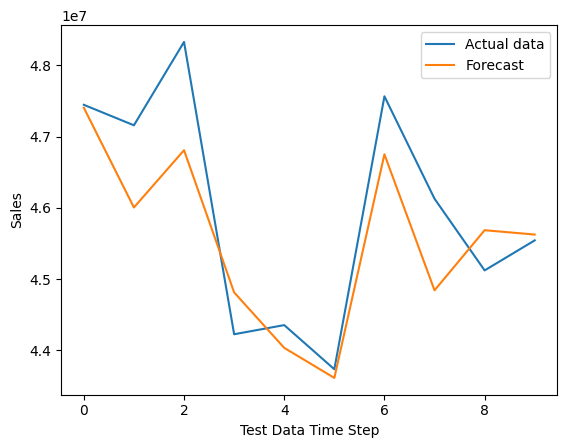

In [18]:
train = data[:-10]
test = data[-10:]
mod = sm.tsa.statespace.SARIMAX(
    data[:-10], order=(1, 0, 1), seasonal_order=(1, 0, 0, 52)
)
res = mod.fit(disp=False)
fcst = res.forecast(steps=10)

plt.plot(list(test))
plt.plot(list(fcst))
plt.legend(["Actual data", "Forecast"])
plt.ylabel("Sales")
plt.xlabel("Test Data Time Step")
plt.show()